In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
df = pd.read_csv('/content/drive/MyDrive/tcc/pre-processed.csv')

# Transformando todas as letras em minúsculas
df['preprocessed_news'] = df['preprocessed_news'].str.lower()

In [26]:
# Cria um vetor de palavras para cada notícia
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['preprocessed_news'])

# Aplica a técnica tf-idf para calcular a importância de cada palavra
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
rfc.n_classes_

2

In [28]:
y_pred = rfc.predict(X_test)
y_pred

array(['fake', 'fake', 'true', ..., 'true', 'fake', 'fake'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Acurácia: {:.3f}%'.format(accuracy * 100))
print('\nRelatório de Classificação:\n', class_report)

Acurácia: 95.139%

Relatório de Classificação:
               precision    recall  f1-score   support

        fake       0.93      0.97      0.95       718
        true       0.97      0.93      0.95       722

    accuracy                           0.95      1440
   macro avg       0.95      0.95      0.95      1440
weighted avg       0.95      0.95      0.95      1440



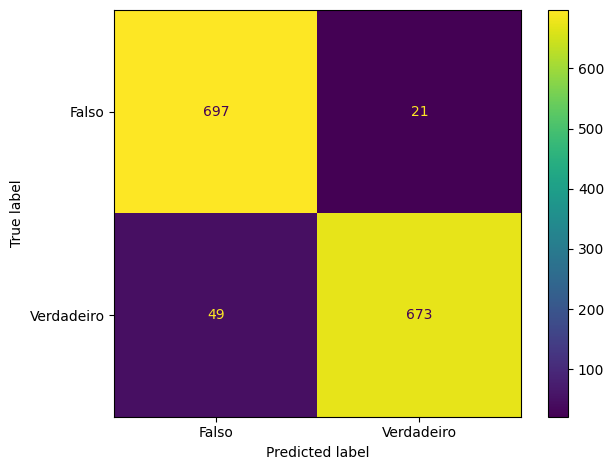

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = ['Falso', 'Verdadeiro']

ConfusionMatrixDisplay.from_estimator(
    rfc, X_test, y_test, display_labels=class_names, xticks_rotation="horizontal"
)
plt.tight_layout()
plt.show()